## HEART DISEASE PREDICTION

## 1.Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# 2.Importing Dataset

In [3]:
heart_data = pd.read_csv(r"Desktop/heart.csv")

In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart_data.shape

(303, 14)

In [6]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### we dont have any missing values



## 3.Let's analyze the target variable

In [9]:
heart_data["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [10]:
heart_data["target"].unique()

array([1, 0], dtype=int64)

### as the values are 1's and 0's it is a classification problem

## Let's check the coorelation between the coloumns

In [11]:
print(heart_data.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Let's do some Exploratory Data Analysis

In [12]:
#X data
X = heart_data.drop("target",axis=1)

#y data
y=heart_data["target"]

In [13]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

1    165
0    138
Name: target, dtype: int64


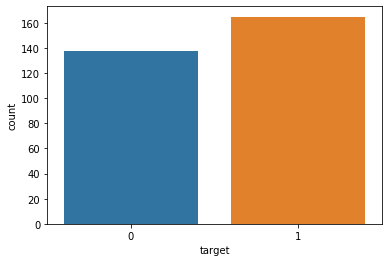

In [15]:
sns.countplot(y)
target_temp=heart_data.target.value_counts()
print(target_temp)

In [16]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features
### Analysing the 'Sex' feature

In [17]:
heart_data["sex"].unique()

array([1, 0], dtype=int64)

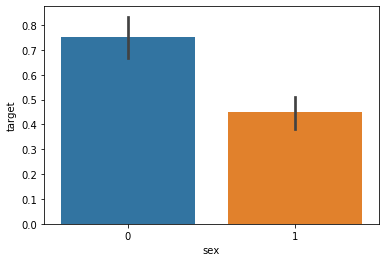

In [18]:
sns.barplot(heart_data["sex"],y);

### We notice, that females are more likely to have heart problems than males
## Analysing the 'Chest Pain Type' feature

In [19]:
heart_data["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

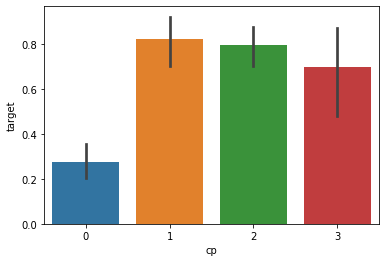

In [20]:
sns.barplot(heart_data["cp"],y);

### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems
## Analysing the FBS feature

In [21]:
heart_data["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
heart_data["fbs"].unique()

array([1, 0], dtype=int64)

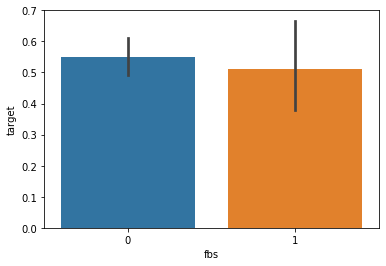

In [23]:
sns.barplot(heart_data["fbs"],y);

## Analysing restecg 

In [24]:
dataset["restecg"].unique()

NameError: name 'dataset' is not defined

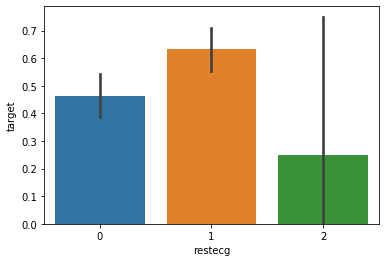

In [25]:
sns.barplot(heart_data["restecg"],y);

### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems
## Analysing the FBS feature

In [26]:
heart_data["exang"].unique()

array([0, 1], dtype=int64)

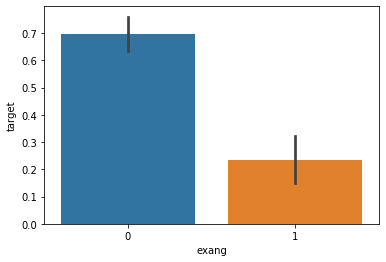

In [27]:
sns.barplot(heart_data["exang"],y);

## Analysing the slope feature

In [28]:
heart_data["slope"].unique()

array([0, 2, 1], dtype=int64)

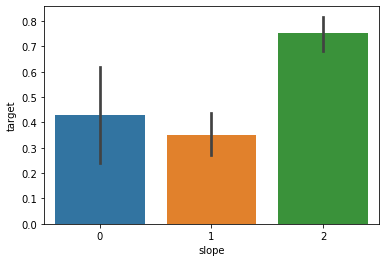

In [29]:
sns.barplot(heart_data["slope"],y);

In [30]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Analysing the 'ca' feature

In [31]:
heart_data["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

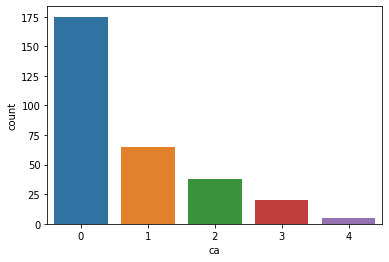

In [32]:
sns.countplot(heart_data["ca"]);

### ca=0 has large number of heartdisease

## Analyzing "thal" feature

In [33]:
heart_data["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

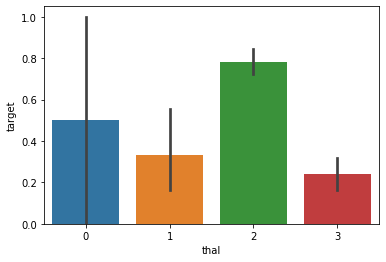

In [34]:
sns.barplot(heart_data["thal"],y);

## 4.Train Test Split

In [35]:
from sklearn.model_selection import train_test_split

X=heart_data.drop("target",axis=1)
y=heart_data["target"]

In [36]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=2)

In [39]:
print(" X_train: ",X_train.shape,"\n",
"X_test: ",X_test.shape,"\n",
"y_train: ",y_train.shape,"\n",
"y_test: ",y_test.shape)


 X_train:  (242, 13) 
 X_test:  (61, 13) 
 y_train:  (242,) 
 y_test:  (61,)


## 5.Model fitting

In [40]:
from sklearn.metrics import accuracy_score

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

y_preds_lr=lr.predict(X_test)

In [42]:
y_preds_lr.shape

(61,)

In [43]:
score_lr=round(accuracy_score(y_preds_lr,y_test)*100,2)

In [44]:
print("The accuracy score obtained  using Logistic Regressio is : ",score_lr,"%")

The accuracy score obtained  using Logistic Regressio is :  90.16 %


## Navie Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

y_preds_nb = nb.predict(X_test)

In [46]:
y_preds_nb.shape

(61,)

In [47]:
score_nb = round(accuracy_score(y_preds_nb,y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: ",(score_nb)," %")


The accuracy score achieved using Naive Bayes is:  88.52  %


## SVM

In [48]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

y_preds_svm = sv.predict(X_test)


In [49]:
y_preds_svm.shape

(61,)

In [50]:
score_svm = round(accuracy_score(y_preds_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: ",score_svm," %")

The accuracy score achieved using Linear SVM is:  86.89  %


## K Nearest Neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

y_preds_knn=knn.predict(X_test)

In [52]:
y_preds_knn.shape

(61,)

In [53]:
score_knn = round(accuracy_score(y_preds_knn,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: ",score_knn," %")

The accuracy score achieved using Linear SVM is:  73.77  %


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy=0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    y_preds_dt=dt.predict(X_test)
    current_accuracy = round(accuracy_score(y_preds_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x=x
        
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)
y_preds_dt= dt.predict(X_test)

In [55]:
y_preds_dt.shape

(61,)

In [56]:
score_dt = round(accuracy_score(y_preds_dt,y_test)*100,2)
print("The accuracy score achieved using Decision Tree is: ",score_dt," %")

The accuracy score achieved using Decision Tree is:  88.52  %


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} esitmators")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"Model accuracy on test set: {clf.score(X_test,y_test)*100:.2f}%")
    print(" ")

y_preds_rf = clf.predict(X_test)

Trying model with 10 esitmators
Model accuracy on test set: 85.25%
 
Trying model with 20 esitmators
Model accuracy on test set: 86.89%
 
Trying model with 30 esitmators
Model accuracy on test set: 90.16%
 
Trying model with 40 esitmators
Model accuracy on test set: 90.16%
 
Trying model with 50 esitmators
Model accuracy on test set: 86.89%
 
Trying model with 60 esitmators
Model accuracy on test set: 88.52%
 
Trying model with 70 esitmators
Model accuracy on test set: 88.52%
 
Trying model with 80 esitmators
Model accuracy on test set: 90.16%
 
Trying model with 90 esitmators
Model accuracy on test set: 88.52%
 


### Let's fix n-esitmators as 80

In [58]:
clf = RandomForestClassifier(n_estimators=80).fit(X_train,y_train)

y_preds_rf = clf.predict(X_test)


In [59]:
y_preds_rf.shape

(61,)

In [60]:
score_rf = round(accuracy_score(y_preds_rf,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: ",score_rf," %")

The accuracy score achieved using Linear SVM is:  90.16  %


##  XGBoost

In [153]:
!pip install xgboost

In [61]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

[14:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [62]:
y_pred_xgb.shape


(61,)

In [63]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using XGBoost is: ",score_xgb," %")

The accuracy score achieved using XGBoost is:  85.25  %


## 6. OutputFinalScore

In [64]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]
for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 90.16 %
The accuracy score achieved using Naive Bayes is: 88.52 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 73.77 %
The accuracy score achieved using Decision Tree is: 88.52 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 85.25 %


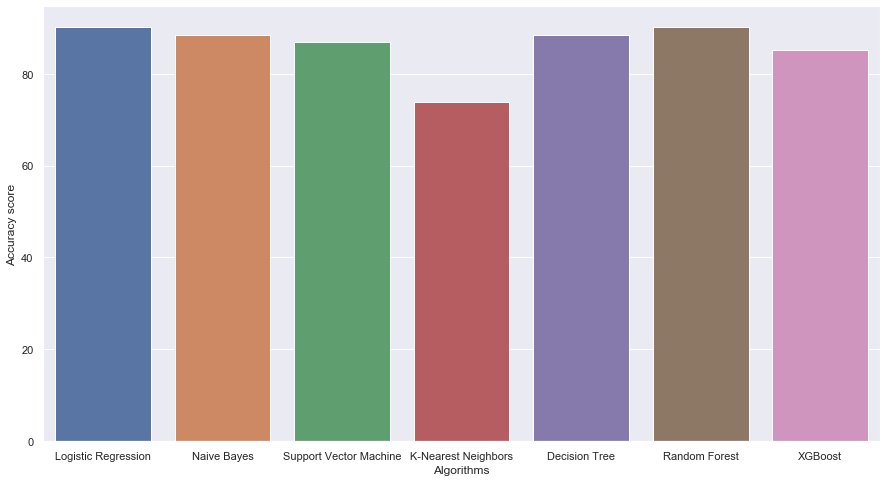

In [65]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores);

### Hence form the graphs we can conclude that Logistic Regression or Random Forest(n_classifiers=80) are best to use to predict heart_disease



In [67]:
def prediction_calculator(n):
    for i in range(n):
        print("ENTER THE DETAILS FOR PERSON : ",(i+1))
        age_ip=int(input("\nEnter Age: "))
        sex_ip=int(input("\nIf Female Enter 0\nIf Male Enter 1 : "))
        print("\nValue 0: asymptomatic\nValue 1: atypical angina\nValue 2: non-anginal pain\nValue 3: typical angina")
        cp_ip=int(input("\nEnter Chest Pain value (1/2/3/4) :  "))
        trestbps_ip=int(input("\nEntert Resting Blood Pressure: "))
        chol_ip=int(input("\nEnter Cholestrol Value: "))
        print("\nThe person’s fasting blood sugar if greater than 120mg Enter 1 or 0 ")
        fbs_ip=int(input("\nEnter Fasting Blood Pressure value (0/1): "))
        print("\nresting electrocardiographic results\nValue 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria\nValue 1: normal\nValue 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)")
        restecg_ip=int(input("\nEnter Resting Electrocardiographic value (0/1/2) : "))
        thalach_ip=int(input("\nEnter Max heart rate achieved : "))
        exang_ip=int(input("\nEnter Exercise induced angina : "))
        oldpeak_ip=float(input("\nEnter ST depression induced value : "))
        print("\nPerson's slope value\n0: downsloping\n1: flat\n2: upsloping")
        slope_ip=int(input("\nEnter slope value (0/1/2) : "))
        ca_ip=int(input("\nEnter number of major vessels (0-3) : "))
        print("\nThalassemia:\nValue 0: NULL\nValue 1: fixed defect\nValue 2: normal blood flow\nValue 3: reversible defect")
        thal_ip=int(input("\nEnter Thalassemia Value: "))
        
        c=np.array([age_ip, sex_ip, cp_ip, trestbps_ip, chol_ip, fbs_ip, restecg_ip, thalach_ip,
       exang_ip, oldpeak_ip, slope_ip, ca_ip, thal_ip])
        c_rs=c.reshape(1,-1)
        pred = clf.predict(c_rs)
        if pred==1:
            print("\n\nHeart Diseased person Please Consult the Doctor!!")
        else:
            print("\n\nNo Heart Disease :)")
            
no_of_people=int(input("ENTER NUMBER OF PEOPLE : "))
prediction_calculator(no_of_people)

ENTER NUMBER OF PEOPLE : 1
ENTER THE DETAILS FOR PERSON :  1

Enter Age: 56

If Female Enter 0
If Male Enter 1 : 0

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: typical angina

Enter Chest Pain value (1/2/3/4) :  1

Entert Resting Blood Pressure: 130

Enter Cholestrol Value: 236

The person’s fasting blood sugar if greater than 120mg Enter 1 or 0 

Enter Fasting Blood Pressure value (0/1): 0

resting electrocardiographic results
Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
Value 1: normal
Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

Enter Resting Electrocardiographic value (0/1/2) : 0

Enter Max heart rate achieved : 174

Enter Exercise induced angina : 0

Enter ST depression induced value : 0

Person's slope value
0: downsloping
1: flat
2: upsloping

Enter slope value (0/1/2) : 1

Enter number of major vessels (0-3) : 1

Thalassemia:
Value 0: NULL
